### CNNs using dl2!

In [1]:
import dl2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train, y_test = dl2.onehot(y_train, 10), dl2.onehot(y_test, 10)
x_train, x_test = np.expand_dims(x_train, 3) / 255.0, np.expand_dims(x_test, 3) / 255.0

### CNNs > MLPs at image recognition 
CNNs use feature maps and kernels $\implies$ less visual information is lost and the sparsely connected nature of CNNs make them less susceptible to overfitting. 

In [3]:
net = dl2.NN()
net.add(dl2.conv2d(filters=4, filters_dim=(4, 4), strides=(2, 2), activation='relu', input_dim=(28, 28, 1)))
net.add(dl2.flatten(bias=True))
net.add(dl2.dense(10, activation='softmax'))

In [4]:
net.init()
net.info()

{'input_dim': (28, 28, 1), 'output_dim': (13, 13, 4), 'bias': True, 'filters': 4, 'filters_dim': (4, 4), 'strides': (2, 2), 'layer': 'conv2d', 'activation': 'relu'}
{'input_dim': (13, 13, 4), 'output_dim': 676, 'bias': True, 'layer': 'flatten', 'activation': 'none'}
{'input_dim': 676, 'output_dim': 10, 'layer': 'dense', 'activation': 'softmax'}
trainable parameters: 8186


In [5]:
net.forward(x_train[0])

array([0.09841134, 0.09324758, 0.0854329 , 0.10186754, 0.08628335,
       0.08634161, 0.09647029, 0.12815824, 0.09293121, 0.13085592])

In [6]:
dl2.accuracy(net, x_test, y_test)

10.05

In [7]:
net.opt = dl2.Adam(net.params(), 5e-3, epsilon=1e-5)
net.loss_fn = 'ce'
history = net.fit(x_train, y_train, epochs=10, batch_size=10)

  3%|██▎                                                                         | 1863/60000 [00:04<02:04, 465.40it/s]C:\Users\rgbka\Desktop\Projects\dl2.py:461: RuntimeWarning: divide by zero encountered in log
  return - y * np.log(self.L[-1]) - (1 - y) * np.log(1 - self.L[-1])
C:\Users\rgbka\Desktop\Projects\dl2.py:461: RuntimeWarning: invalid value encountered in multiply
  return - y * np.log(self.L[-1]) - (1 - y) * np.log(1 - self.L[-1])
100%|███████████████████████████████████████████████████████████████████████████| 60000/60000 [01:40<00:00, 599.60it/s]


In [8]:
dl2.accuracy(net, x_test, y_test)

96.4

### Visualizing weights and gradients

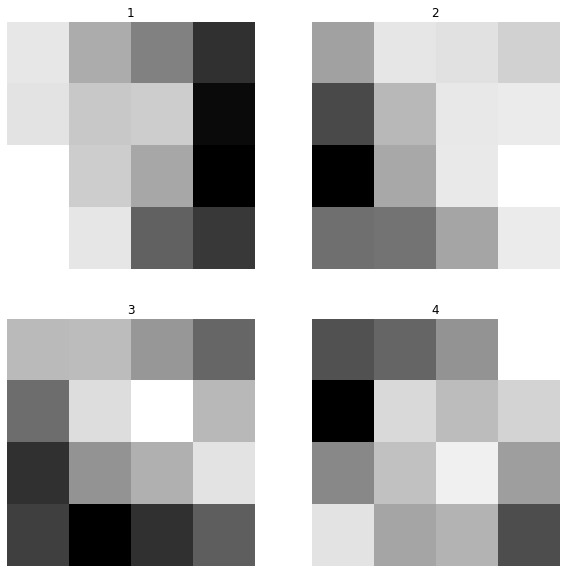

In [9]:
filters = net.W[0]
fig = plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.title(f'{i + 1}')
    plt.imshow(filters[i][:, :, 0], cmap='gray')
plt.show()

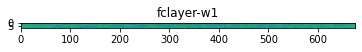

In [10]:
plt.title('fclayer-w1')
plt.imshow(net.W[-1])

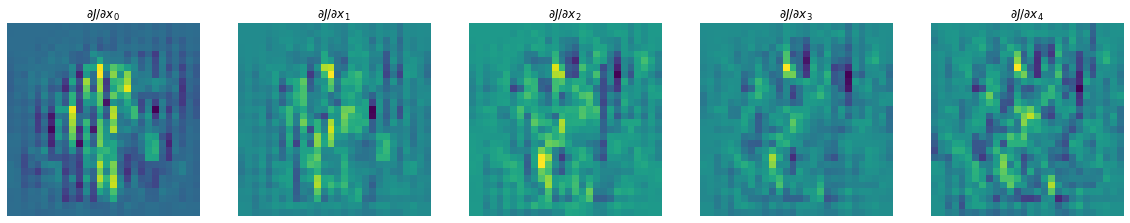

In [11]:
first_layer_grads = history['first_layer_grads']
fig = plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.title(f'$\partial J/\partial x_{i}$')
    plt.imshow(first_layer_grads[i][:, :, 0])
plt.show()

### Loss and error plot 

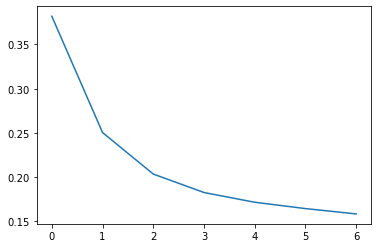

In [12]:
plt.plot([np.sum(losses) for losses in history['losses']])
plt.show()

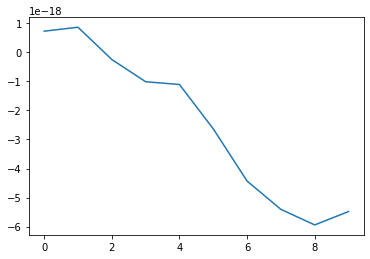

In [13]:
plt.plot([np.sum(errors) for errors in history['last_layer_grads']])
plt.show()